In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

## Part 1: Perceptron for Logical Operations

### AND Operation

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = self.predict_single(X[i])
                error = y[i] - y_pred
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
    
    def predict_single(self, x):
        return 1 if np.dot(x, self.weights) + self.bias > 0 else 0
    
    def predict(self, X):
        return [self.predict_single(x) for x in X]

In [3]:
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

perceptron_and = Perceptron()
perceptron_and.fit(X_and, y_and)

print("AND Operation:")
for i, x in enumerate(X_and):
    pred = perceptron_and.predict_single(x)
    print(f"{x[0]} AND {x[1]} = {pred} (Expected: {y_and[i]})")

AND Operation:
0 AND 0 = 0 (Expected: 0)
0 AND 1 = 0 (Expected: 0)
1 AND 0 = 0 (Expected: 0)
1 AND 1 = 1 (Expected: 1)


### OR Operation

In [4]:
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

perceptron_or = Perceptron()
perceptron_or.fit(X_or, y_or)

print("OR Operation:")
for i, x in enumerate(X_or):
    pred = perceptron_or.predict_single(x)
    print(f"{x[0]} OR {x[1]} = {pred} (Expected: {y_or[i]})")

OR Operation:
0 OR 0 = 0 (Expected: 0)
0 OR 1 = 1 (Expected: 1)
1 OR 0 = 1 (Expected: 1)
1 OR 1 = 1 (Expected: 1)


### XOR Operation

In [5]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

perceptron_xor = Perceptron()
perceptron_xor.fit(X_xor, y_xor)

print("XOR Operation:")
for i, x in enumerate(X_xor):
    pred = perceptron_xor.predict_single(x)
    print(f"{x[0]} XOR {x[1]} = {pred} (Expected: {y_xor[i]})")

print("\nNote: Single perceptron cannot solve XOR problem. It requires multi-layer network.")

XOR Operation:
0 XOR 0 = 1 (Expected: 0)
0 XOR 1 = 1 (Expected: 1)
1 XOR 0 = 0 (Expected: 1)
1 XOR 1 = 0 (Expected: 0)

Note: Single perceptron cannot solve XOR problem. It requires multi-layer network.


## Part 2: Activation Functions from Scratch

### Sigmoid and Tanh Functions

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

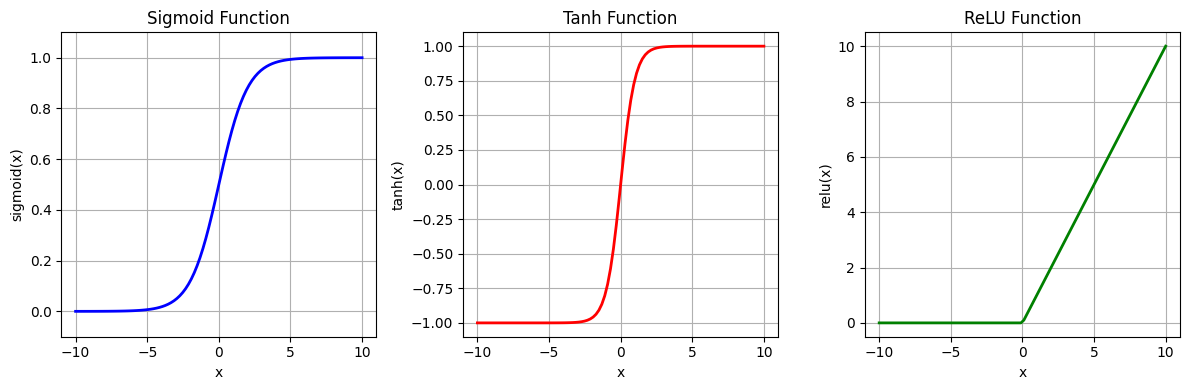

In [7]:
x_values = np.linspace(-10, 10, 100)

sigmoid_values = sigmoid(x_values)
tanh_values = tanh(x_values)
relu_values = relu(x_values)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x_values, sigmoid_values, 'b-', linewidth=2)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.ylim(-0.1, 1.1)

plt.subplot(1, 3, 2)
plt.plot(x_values, tanh_values, 'r-', linewidth=2)
plt.title('Tanh Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.ylim(-1.1, 1.1)

plt.subplot(1, 3, 3)
plt.plot(x_values, relu_values, 'g-', linewidth=2)
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.grid(True)

plt.tight_layout()
plt.show()

### Analysis: Output Ranges

**Sigmoid Function:**
- Range: (0, 1)
- Always positive
- Smooth S-shaped curve
- Saturates at extremes

**Tanh Function:**
- Range: (-1, 1)
- Can be negative or positive
- Smooth S-shaped curve
- Zero-centered
- Saturates at extremes

**Similarities:**
- Both are smooth and differentiable
- Both are S-shaped (sigmoid)
- Both saturate at extreme values

**Differences:**
- Sigmoid: (0,1) vs Tanh: (-1,1)
- Tanh is zero-centered, Sigmoid is not
- Tanh has steeper gradient around zero

## Part 3: Banknote Authentication Dataset

### Load and Prepare Data

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
data = pd.read_csv(url, header=None)
data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())

print("\nClass distribution:")
print(data['class'].value_counts())

Dataset shape: (1372, 5)

First 5 rows:
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Class distribution:
class
0    762
1    610
Name: count, dtype: int64


In [9]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Neural Network Implementation

In [10]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))
        self.activation = activation
        
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        
        if self.activation == 'sigmoid':
            self.a1 = sigmoid(self.z1)
        elif self.activation == 'relu':
            self.a1 = relu(self.z1)
        
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, learning_rate=0.01):
        m = X.shape[0]
        
        dz2 = self.a2 - y.reshape(-1, 1)
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
        
        if self.activation == 'sigmoid':
            da1 = np.dot(dz2, self.W2.T)
            dz1 = da1 * self.a1 * (1 - self.a1)
        elif self.activation == 'relu':
            da1 = np.dot(dz2, self.W2.T)
            dz1 = da1 * (self.z1 > 0)
        
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)
        
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
    
    def train(self, X, y, epochs=1000, learning_rate=0.01):
        losses = []
        for i in range(epochs):
            output = self.forward(X)
            loss = np.mean((output.flatten() - y) ** 2)
            losses.append(loss)
            self.backward(X, y, learning_rate)
        return losses
    
    def predict(self, X):
        output = self.forward(X)
        return (output.flatten() > 0.5).astype(int)

### Training with Sigmoid Activation

In [11]:
nn_sigmoid = NeuralNetwork(4, 10, 1, activation='sigmoid')
losses_sigmoid = nn_sigmoid.train(X_train_scaled, y_train, epochs=1000, learning_rate=0.1)

y_pred_sigmoid = nn_sigmoid.predict(X_test_scaled)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)

print("Sigmoid Activation Results:")
print(f"Accuracy: {accuracy_sigmoid:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sigmoid))

Sigmoid Activation Results:
Accuracy: 0.9782

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



### Training with ReLU Activation

In [12]:
nn_relu = NeuralNetwork(4, 10, 1, activation='relu')
losses_relu = nn_relu.train(X_train_scaled, y_train, epochs=1000, learning_rate=0.1)

y_pred_relu = nn_relu.predict(X_test_scaled)
accuracy_relu = accuracy_score(y_test, y_pred_relu)

print("ReLU Activation Results:")
print(f"Accuracy: {accuracy_relu:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_relu))

ReLU Activation Results:
Accuracy: 0.9891

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.99      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



### Performance Comparison

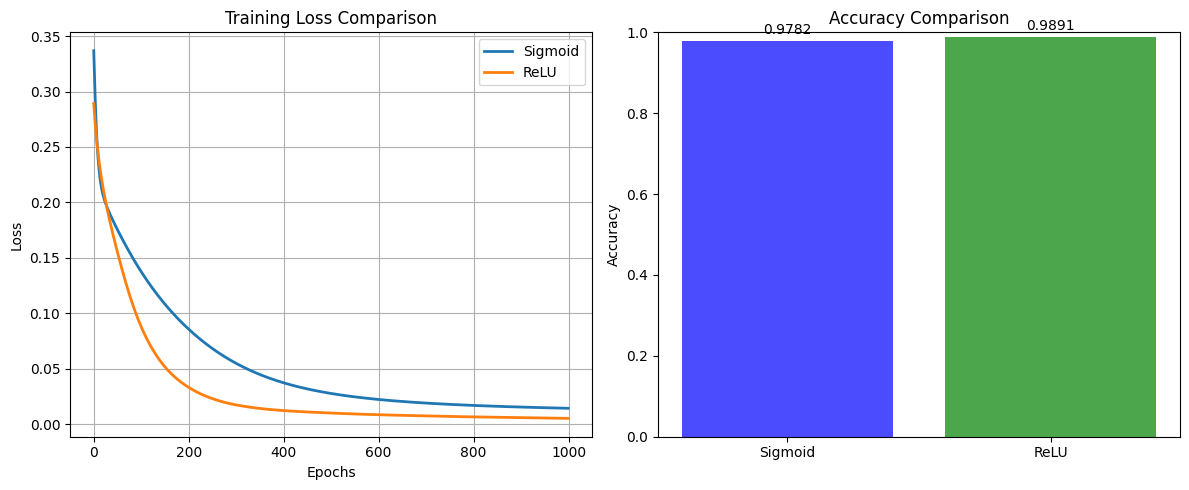


Summary:
Sigmoid Accuracy: 0.9782
ReLU Accuracy: 0.9891
Difference: 0.0109


In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses_sigmoid, label='Sigmoid', linewidth=2)
plt.plot(losses_relu, label='ReLU', linewidth=2)
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
activations = ['Sigmoid', 'ReLU']
accuracies = [accuracy_sigmoid, accuracy_relu]
bars = plt.bar(activations, accuracies, color=['blue', 'green'], alpha=0.7)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\nSummary:")
print(f"Sigmoid Accuracy: {accuracy_sigmoid:.4f}")
print(f"ReLU Accuracy: {accuracy_relu:.4f}")
print(f"Difference: {abs(accuracy_relu - accuracy_sigmoid):.4f}")